# # # This is on classification 

In [ ]:


#from sklearn.datasets import load_iris
#import pandas as pd
#iris_dataset = load_iris()
#iris_dataset.keys()
#dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
#iris = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
#iris['species'] = iris_dataset.target
#iris.loc[iris['species'] == 0 , 'species'] = 'iris-setosa'
#iris.loc[iris['species'] == 1 , 'species'] = 'iris-vericolor'
#iris.loc[iris['species'] == 2 , 'species'] = 'iris-virginica'
#iris.head()

species
iris-setosa        50
iris-versicolor    50
iris-virginica     50
dtype: int64


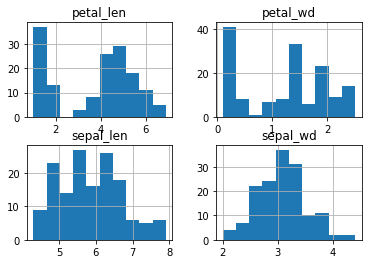

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016288AD9E08>,
      dtype=object)

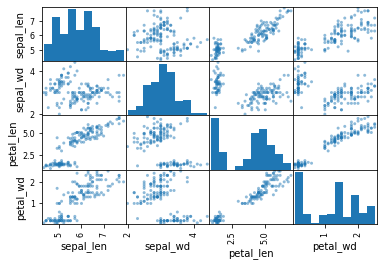

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
iris = pd.read_csv('iris.csv')
iris.head()
iris.drop('id', axis = 1 , inplace = True)
groups = iris.groupby('species')
print(groups.size())
iris['species'].value_counts()
iris.hist()
plt.show()
iris.corr()
pd.plotting.scatter_matrix(iris)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = iris[['petal_len', 'petal_wd']]
Y = iris['species']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 1, test_size = 0.3,stratify = Y )
print(Y_test.value_counts())
print(Y_train.value_counts())
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
pred

iris-virginica     15
iris-versicolor    15
iris-setosa        15
Name: species, dtype: int64
iris-virginica     35
iris-versicolor    35
iris-setosa        35
Name: species, dtype: int64


array(['iris-virginica', 'iris-setosa', 'iris-setosa', 'iris-versicolor',
       'iris-versicolor', 'iris-versicolor', 'iris-virginica',
       'iris-versicolor', 'iris-virginica', 'iris-setosa', 'iris-setosa',
       'iris-virginica', 'iris-setosa', 'iris-versicolor', 'iris-setosa',
       'iris-versicolor', 'iris-virginica', 'iris-versicolor',
       'iris-versicolor', 'iris-virginica', 'iris-virginica',
       'iris-setosa', 'iris-versicolor', 'iris-virginica',
       'iris-versicolor', 'iris-versicolor', 'iris-versicolor',
       'iris-virginica', 'iris-setosa', 'iris-virginica', 'iris-setosa',
       'iris-setosa', 'iris-versicolor', 'iris-versicolor',
       'iris-virginica', 'iris-virginica', 'iris-setosa', 'iris-setosa',
       'iris-setosa', 'iris-versicolor', 'iris-virginica',
       'iris-virginica', 'iris-versicolor', 'iris-setosa', 'iris-setosa'],
      dtype=object)

In [104]:
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob[10:12]
y_pred[10:12]

array(['iris-setosa', 'iris-virginica'], dtype=object)

In [113]:
(y_pred == Y_test.values).sum() / Y_test.size

0.9777777777777777

In [114]:
knn.score(X_test, Y_test)

0.9777777777777777

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9777777777777777

In [123]:
# Confusion_matrix used to count the number of correct and incorrect prediction broken down by each class.
from sklearn.metrics import confusion_matrix 
confusion_matrix(Y_test, y_pred, labels = ['iris-setosa','iris-versicolor', 'iris-virginica'])

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

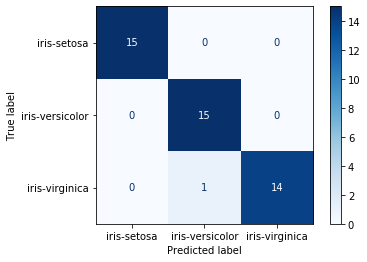

In [131]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(knn, X_test, Y_test, cmap = plt.cm.Blues)

In [132]:
Y_test

148     iris-virginica
5          iris-setosa
6          iris-setosa
106     iris-virginica
75     iris-versicolor
71     iris-versicolor
108     iris-virginica
68     iris-versicolor
111     iris-virginica
16         iris-setosa
15         iris-setosa
127     iris-virginica
8          iris-setosa
57     iris-versicolor
47         iris-setosa
76     iris-versicolor
141     iris-virginica
66     iris-versicolor
74     iris-versicolor
147     iris-virginica
102     iris-virginica
12         iris-setosa
65     iris-versicolor
121     iris-virginica
94     iris-versicolor
56     iris-versicolor
98     iris-versicolor
144     iris-virginica
43         iris-setosa
113     iris-virginica
11         iris-setosa
0          iris-setosa
62     iris-versicolor
53     iris-versicolor
107     iris-virginica
112     iris-virginica
37         iris-setosa
25         iris-setosa
1          iris-setosa
50     iris-versicolor
120     iris-virginica
149     iris-virginica
54     iris-versicolor
7          

In [172]:
# this is the k-fold cross validation method.
# first we create a new model of the k nearest neighbors class.
from sklearn.neighbors import KNeighborsClassifier 
knn_cv = KNeighborsClassifier(n_neighbors =41)
# we import the cross_val() function
from sklearn.model_selection import cross_val_score
# then we train the model with 5-fold cv 
cv_score = cross_val_score(knn_cv, X, Y, cv = 5)
cv_score.mean()

0.96

## GridSearchCV()


In [178]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np 
knn_2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2,10)}
knn_gscv = GridSearchCV(knn_2, param_grid, cv =5)
knn_gscv.fit(X,Y)
knn_gscv.best_params_
knn_gscv.best_score_


0.9666666666666668

In [189]:
Knn_final = KNeighborsClassifier(n_neighbors = knn_gscv.best_params_['n_neighbors'])
Knn_final.fit(X, Y)
y_pred = Knn_final.predict(X)
Knn_final.score(X,Y)



0.9733333333333334

In [205]:
# predicting new data.

new_data1 = np.array([[3.76,1.20]])
new_data2 = [[3.76, 1.2], [5.25,1.2], [1.58, 1.2]]
Knn_final.predict(new_data1) ; knn.predict_proba(new_data2)
type(new_data2)

list